# Tutorial for loading leaderboard competition data

To start with this competition, you will need to download the data for the two tasks, sleep cassette and motor imagery (MI). You could either handle them yourself, downloading them from here:
- Sleep Source : https://figshare.com/articles/dataset/SleepSource/14839659
- Sleep Leaderboard test data : https://figshare.com/articles/dataset/LeaderboardSleep/14839653
- MI source 1 (Cho2017) : ftp://parrot.genomics.cn/gigadb/pub/10.5524/100001_101000/100295/mat_data/
- MI source 2 (BNCI 001-2014) : http://bnci-horizon-2020.eu/database/data-sets
- MI source 3 (PhysionetMI) : https://physionet.org/content/eegmmidb/1.0.0/
- MI Leaderboard test data : https://figshare.com/articles/dataset/LeaderboardSleep/14839653

You could also use our competition [package](https://github.com/sylvchev/beetl-competition) to take care automatically of the downloading part, as shown in this tutorial.

Description of the datasets and specific information are available from https://beetl.ai/data, and http://moabb.neurotechx.com/docs/datasets.html 

**Important** 
Please note that for Task 1, you are ONLY allowed to use data in 'SleepSource' and 'LeaderboardSleep', we regard using data not in these folders as cheating. 

For Task 2, you are ONLY allowed to use Cho 2017, BNCI 2014-001, PhysionetMI (see how to use MOABB API to download in motor imagery task start kits) and data provided in 'leaderboardMI', we regard using data not in these data sets and folders as cheating. 

We will test run code from top ranking teams in the final stage of the competition. Please fix your random seed or so to make sure the experiemnts are reproducible.

## Sleep stage task

The goal is to detect sleep stage, using source sleep EEG age group 25-59 with training trials and labels, and apply this on target age group 60-80 (10 sessions). The target dataset, called Leaderboard Sleep, is divided in two groups. First group contains 5 example subjects with labels, they are the example subjects from the testing group. Second group is the testing group, which contains the leaderboard subjects 6-17 that without labels. You need to give predictions for those labels.

**Data information**

| Type | Value |
| :- | :-: |
| Sampling rate | 100 Hz |
| Trial window | 30s |
| Nb of channels | 2 bipolar (Fpz-Cz, Pz-Oz) |
| Highpass filter | 0.5 Hz |
| Lowpass filter | 100.Hz |

The sleep stage labels to predict are:

| Sleep stage | label |
| :- | :-: |
| W | 0 |
| stage 1 | 1 |
| stage 2| 2 |
| stage 3 | 3 |
| stage 4 | 4 |
| REM | 5 |


## Motor imagery task

The source datasets are available on the url indicated above or from MOABB, as `BNCI2014001`, `Cho2017` and `PhysionetMI` datasets.


For the leaderboard, there are five subjects for testing, S1 S2 are from dataset A, S3 S4 S5 are from dataset B. We will release more dataset details after the competition. For each subject, there are two split of data, training and testing. Training split contain 100 trials (S1, S2) or 120 trials (S3, S4 and S5) with labels as target domain samples of that subject. Testing folders contain the trials that you should predict.

**Data information for dataset A (subject 1 & 2)**

| Type | Value |
| :- | :-: |
| Sampling rate | 500 Hz |
| Trial window | 4s |
| Nb of channels | 63 EEG |
| Highpass filter | 1 Hz |
| Lowpass filter | 100.Hz |
| Notch filter | 50 Hz |

The name of the channels are:
'Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 
'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 
'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8',
'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3', 
'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5', 
'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4', 
'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2',
'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8'.

**Data information for dataset B (subject 3, 4, 5)**

| Type | Value |
| :- | :-: |
| Sampling rate | 200 Hz |
| Trial window | 4s |
| Nb of channels | 32 EEG |
| Highpass filter | 1 Hz |
| Lowpass filter | 100.Hz |

The name of the channels are:
'Fp1', 'Fp2', 'F3', 'Fz', 'F4', 'FC5', 'FC1', 'FC2','FC6', 'C5', 'C3',
'C1', 'Cz', 'C2', 'C4', 'C6', 'CP5', 'CP3', 'CP1',
'CPz', 'CP2', 'CP4', 'CP6', 'P7', 'P5', 'P3', 'P1', 'Pz', 
'P2', 'P4', 'P6', 'P8'

In both datasets, the motor imagery labels to predict are:

| MI task | label |
| :- | :-: |
| Lefthand | 0 |
| Righthand | 1 |
| Feet | 2 |
| Rest | 3 |

**However, in task 2, there will be only three catergorties to predict as output labels - Lefthand (0), Righthand (1) and other (2)**

# Downloading data automatically

You could use the helper [package](https://github.com/sylvchev/beetl-competition) to download automatically the data. You could install it with `pip install git+https://github.com/sylvchev/beetl-competition` or `pip install -e git+https://github.com/sylvchev/beetl-competition#egg=beetl-competition`

And then, it is simple as:

In [1]:
from beetl.task_datasets import BeetlSleepLeaderboard, BeetlMILeaderboard

# _, _, X_sleep_test, _ = BeetlSleepLeaderboard().get_data(subjects=range(6, 18))
# print ("Sleep leaderboard: There are {} trials with {} electrodes and {} time samples".format(*X_sleep_test.shape))

_, _, X_MIA_test = BeetlMILeaderboard().get_data(dataset='A')
print ("MI leaderboard A: There are {} trials with {} electrodes and {} time samples".format(*X_MIA_test.shape))

_, _, X_MIB_test = BeetlMILeaderboard().get_data(dataset='B')
print ("MI leaderboard B: There are {} trials with {} electrodes and {} time samples".format(*X_MIB_test.shape))

SSLError: HTTPSConnectionPool(host='api.figshare.com', port=443): Max retries exceeded with url: /v2/articles/14839650/files (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))

# Loading data manually

Alternatively, you could download the data from https://figshare.com/articles/dataset/leaderboardMI/14839650 and https://figshare.com/articles/dataset/LeaderboardSleep/14839653. When you have downloaded the competition data, you could load your data as shown below. You just need to specify the path where you store the data

## Sleep task

In [1]:
import numpy as np
import pickle

In [2]:
# savebase = 'C:\\Path\\to\\LeaderboardSleep\\testing\\'
savebase = '/Users/wduong/mne_data/MNE-beetlsleepleaderboard-data/testing/'
# savebase = '/home/sylchev/mne_data/MNE-beetlsleepleaderboard-data/testing/'
X_sleep_test = []
for subj in range(6, 18):
    for session in range(1, 3):
        with open(savebase + "leaderboard_s{}r{}X.npy".format(subj, session), 'rb') as f:
            X_sleep_test.append(pickle.load(f))
X_sleep_test = np.concatenate(X_sleep_test)

print ("There are {} trials with {} electrodes and {} time samples".format(*X_sleep_test.shape))

There are 25748 trials with 2 electrodes and 3000 time samples


## Motor imagery dataset A (S1, S2)

In [3]:
import os.path as osp


# path = 'C:\\Path\\to\\leaderboardMI'
path = '/Users/wduong/mne_data/MNE-beetlmileaderboard-data/'
# path = '/home/sylchev/mne_data/MNE-beetlmileaderboard-data/'

X_MIA_test = []
for subj in range(1, 3):
    savebase = osp.join(path, "S{}".format(subj), "testing")

    for i in range(6, 16):
        with open(osp.join(savebase, "race{}_padsData.npy".format(i)), 'rb') as f:
            X_MIA_test.append(pickle.load(f))
X_MIA_test = np.concatenate(X_MIA_test)

print ("There are {} trials with {} electrodes and {} time samples".format(*X_MIA_test.shape))
def print_dataset_info(data,dataset_name="train dataset A"):
    print(dataset_name)
    # for subject_idx in range(len(data)):
    print("Train subject has shape : {}, with range scale ({},{}) ".format(
        data.shape,
        np.max(data), np.min(data)))
print_dataset_info(X_MIA_test)

There are 400 trials with 63 electrodes and 2000 time samples
train dataset A
Train subject has shape : (400, 63, 2000), with range scale (0.00023005100956652313,-0.00016422237968072295) 


In [18]:
#get train target data
path = '/Users/wduong/mne_data/MNE-beetlmileaderboard-data/'

X_MIA_train_data = []
X_MIA_train_label = []

for subj in range(1, 3):
    savebase = osp.join(path, "S{}".format(subj), "training")
    subject_train_data = []
    subject_train_label = []
    for i in range(1, 6):
        with open(osp.join(savebase, "race{}_padsData.npy".format(i)), 'rb') as f:
            subject_train_data.append(pickle.load(f))
        with open(osp.join(savebase, "race{}_padsLabel.npy".format(i)), 'rb') as f:
            subject_train_label.append(pickle.load(f))
    subject_train_data = np.concatenate(subject_train_data)
    subject_train_label = np.concatenate(subject_train_label)

    X_MIA_train_data.append(subject_train_data)
    X_MIA_train_label.append(subject_train_label)
        
for subj in range(len(X_MIA_train_data)):
    print("subject {}".format(subj+1))
    subject_train_data = X_MIA_train_data[subj]
    subject_train_label = X_MIA_train_label[subj]
    print ("There are {} trials with {} electrodes and {} time samples".format(*subject_train_data.shape))
    print ("label shape : ",subject_train_label.shape)
    print(subject_train_label)

subject 1
There are 100 trials with 63 electrodes and 2000 time samples
label shape :  (100,)
[3 0 2 1 2 1 0 3 0 3 1 2 3 1 0 2 3 1 2 0 3 2 0 1 2 3 0 1 0 2 1 3 2 3 0 1 0
 1 2 3 2 3 1 0 3 0 1 2 0 1 2 3 0 1 3 2 0 1 2 3 0 2 3 1 2 3 1 0 3 2 0 1 0 2
 1 3 2 1 0 3 2 3 0 1 2 1 0 3 0 1 3 2 3 0 2 1 2 3 0 1]
subject 2
There are 100 trials with 63 electrodes and 2000 time samples
label shape :  (100,)
[0 3 1 2 3 1 2 0 1 3 2 0 2 3 0 1 0 1 2 3 3 0 2 1 3 2 1 0 1 2 3 0 3 0 1 2 3
 0 1 2 0 3 2 1 2 0 1 3 1 0 2 3 1 3 0 2 0 1 2 3 3 2 1 0 2 1 0 3 1 0 2 3 0 2
 1 3 1 3 0 2 2 0 1 3 2 0 3 1 3 2 0 1 2 0 3 1 2 0 1 3]


## Motor imagery dataset B (S3, S4, S5)

In [5]:
# path = 'C:\\Path\\to\\leaderboardMI'
path = '/Users/wduong/mne_data/MNE-beetlmileaderboard-data/'
# path = '/home/sylchev/mne_data/MNE-beetlmileaderboard-data/'

X_MIB_test = []
for subj in range(3, 6):
    savebase = osp.join(path, "S{}".format(subj), "testing")
    with open(osp.join(savebase, "testing_s{}X.npy".format(subj)), 'rb') as f:
        X_MIB_test.append(pickle.load(f))
X_MIB_test = np.concatenate(X_MIB_test)

print ("There are {} trials with {} electrodes and {} time samples".format(*X_MIB_test.shape))
def print_dataset_info(data,dataset_name="train dataset A"):
    print(dataset_name)
    # for subject_idx in range(len(data)):
    print("Train subject has shape : {}, with range scale ({},{}) ".format(
        data.shape,
        np.max(data), np.min(data)))
print_dataset_info(X_MIB_test,"train dataset B")
print_dataset_info(X_MIB_test*1e-6,"train dataset B")


There are 600 trials with 32 electrodes and 800 time samples
train dataset B
Train subject has shape : (600, 32, 800), with range scale (412.7889082985254,-308.85091060279143) 
train dataset B
Train subject has shape : (600, 32, 800), with range scale (0.0004127889082985254,-0.0003088509106027914) 


In [11]:
#get train target data

path = '/Users/wduong/mne_data/MNE-beetlmileaderboard-data/'

X_MIA_train_data = []
X_MIA_train_label = []

for subj in range(3, 6):
    savebase = osp.join(path, "S{}".format(subj), "training")
    subject_train_data = []
    subject_train_label = []
    with open(osp.join(savebase, "training_s{}X.npy".format(subj)), 'rb') as f:
        subject_train_data.append(pickle.load(f))
    with open(osp.join(savebase, "training_s{}Y.npy".format(subj)), 'rb') as f:
        subject_train_label.append(pickle.load(f))
    subject_train_data = np.concatenate(subject_train_data)
    subject_train_label = np.concatenate(subject_train_label)

    X_MIA_train_data.append(subject_train_data)
    X_MIA_train_label.append(subject_train_label)
        
for subj in range(len(X_MIA_train_data)):
    print("subject {}".format(subj+1))
    subject_train_data = X_MIA_train_data[subj]
    subject_train_label = X_MIA_train_label[subj]
    print ("There are {} trials with {} electrodes and {} time samples".format(*subject_train_data.shape))
    print ("label shape : ",subject_train_label.shape)
    print(subject_train_label)

subject 1
There are 120 trials with 32 electrodes and 800 time samples
label shape :  (120,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
subject 2
There are 120 trials with 32 electrodes and 800 time samples
label shape :  (120,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
subject 3
There are 120 trials with 32 electrodes and 800 time samples
label shape

[[    0     0     3]
 [  500     0     0]
 [ 1000     0     2]
 [ 1500     0     1]
 [ 2000     0     2]
 [ 2500     0     1]
 [ 3000     0     0]
 [ 3500     0     3]
 [ 4000     0     0]
 [ 4500     0     3]
 [ 5000     0     1]
 [ 5500     0     2]
 [ 6000     0     3]
 [ 6500     0     1]
 [ 7000     0     0]
 [ 7500     0     2]
 [ 8000     0     3]
 [ 8500     0     1]
 [ 9000     0     2]
 [ 9500     0     0]
 [10000     0     3]
 [10500     0     2]
 [11000     0     0]
 [11500     0     1]
 [12000     0     2]
 [12500     0     3]
 [13000     0     0]
 [13500     0     1]
 [14000     0     0]
 [14500     0     2]
 [15000     0     1]
 [15500     0     3]
 [16000     0     2]
 [16500     0     3]
 [17000     0     0]
 [17500     0     1]
 [18000     0     0]
 [18500     0     1]
 [19000     0     2]
 [19500     0     3]
 [20000     0     2]
 [20500     0     3]
 [21000     0     1]
 [21500     0     0]
 [22000     0     3]
 [22500     0     0]
 [23000     0     1]
 [23500     0

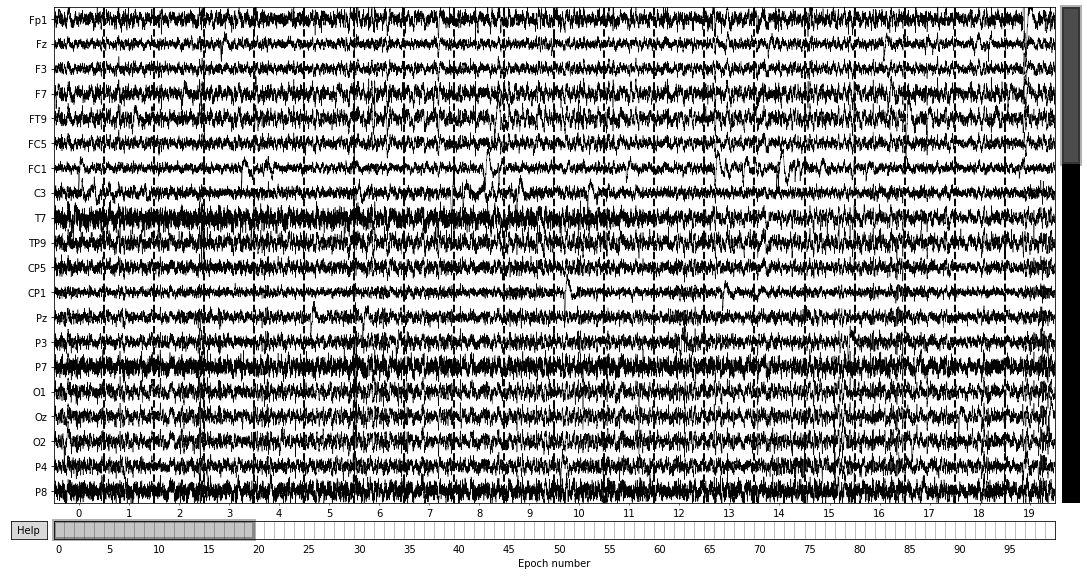

Setting up band-pass filter from 4 - 36 Hz

IIR filter parameters
---------------------
Butterworth bandpass zero-phase (two-pass forward and reverse) non-causal filter:
- Filter order 16 (effective, after forward-backward)
- Cutoffs at 4.00, 36.00 Hz: -6.02, -6.02 dB



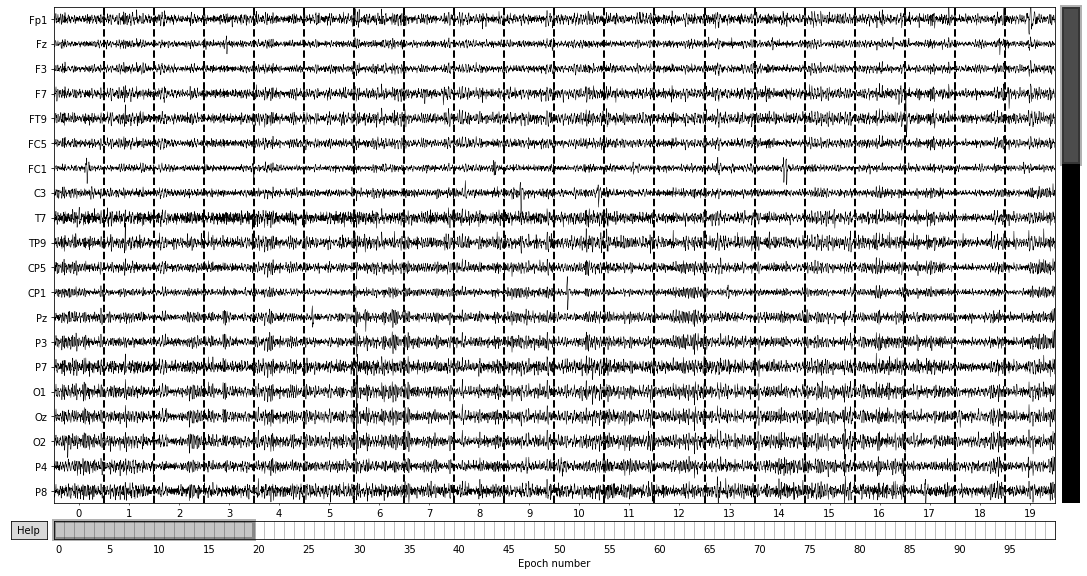

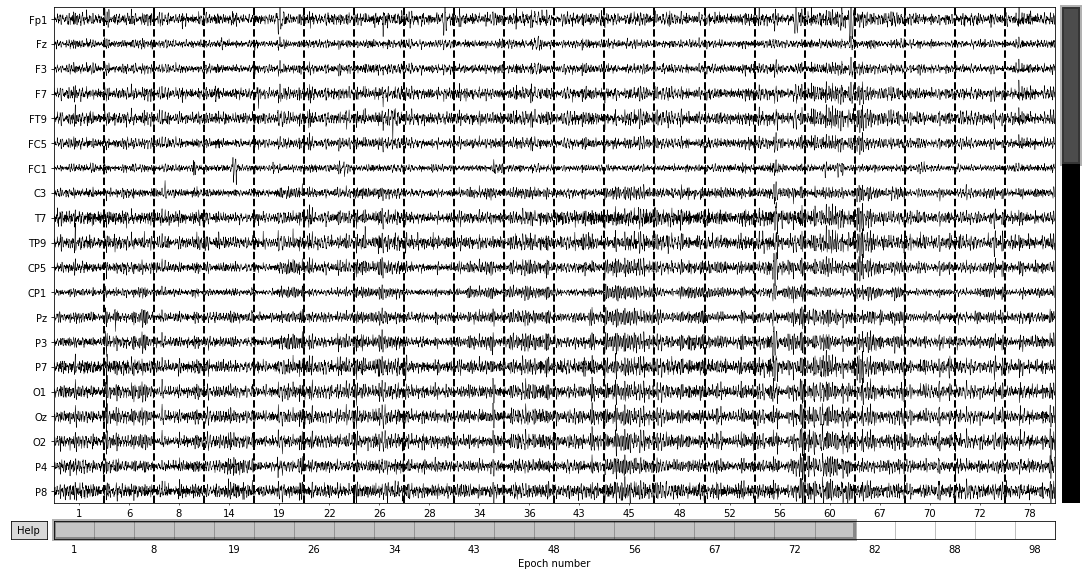

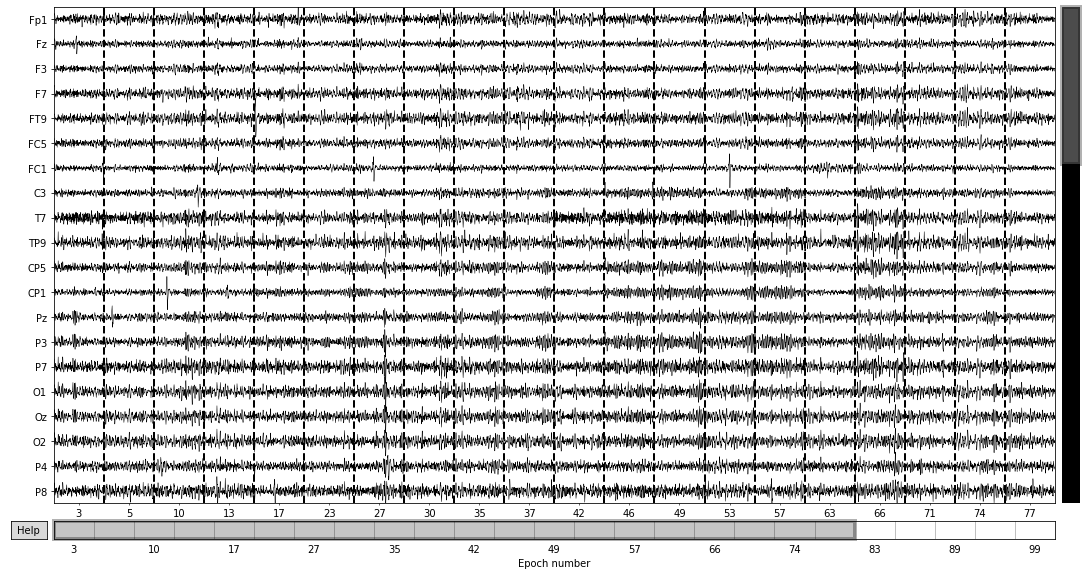

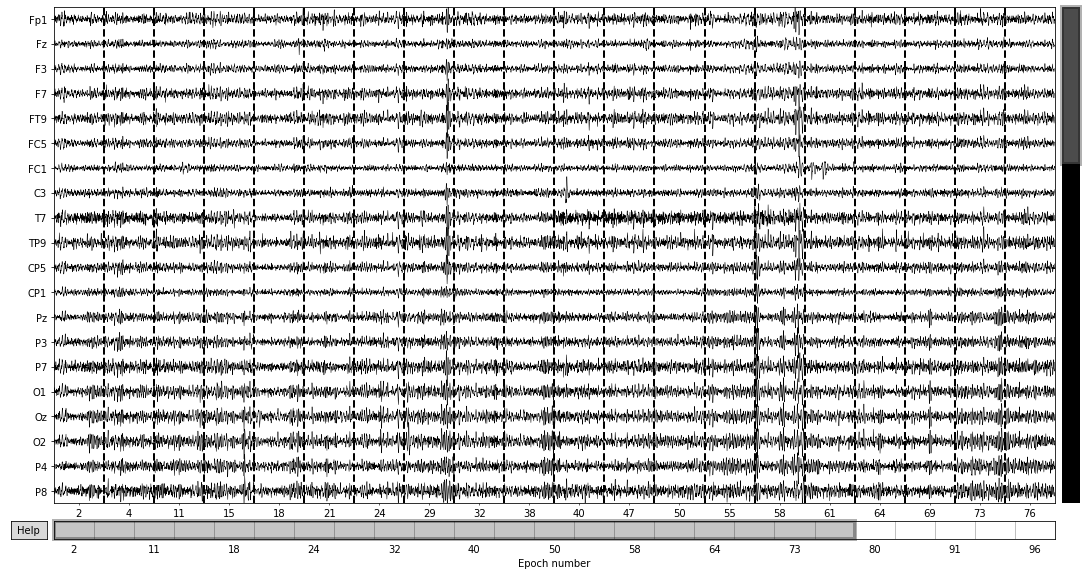

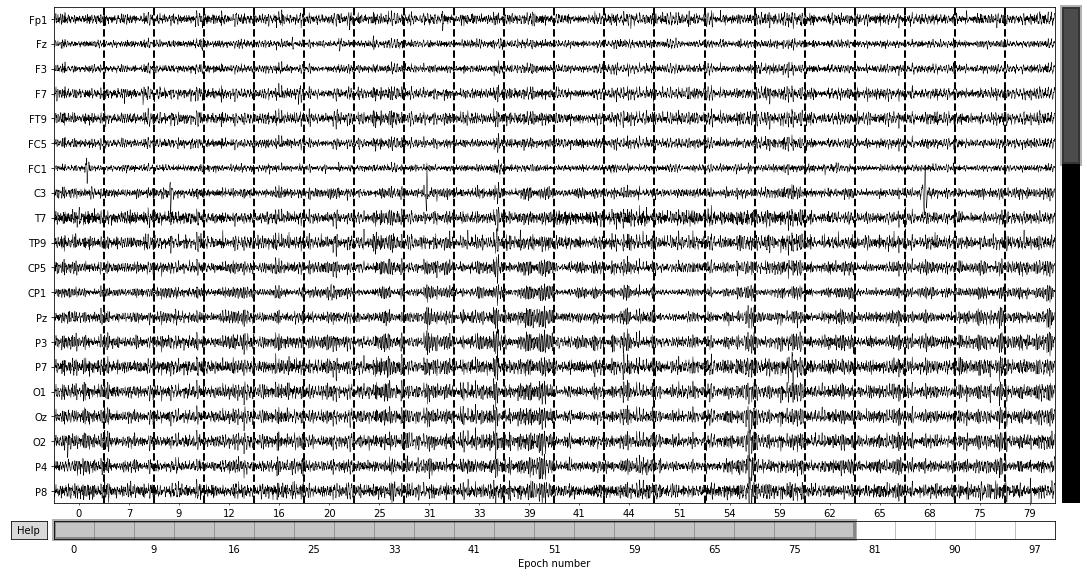

(100, 63, 384)


In [17]:
path = '/Users/wduong/mne_data/MNE-beetlmileaderboard-data/'
import matplotlib.pyplot as plt
import os
import mne

# process Dataset A (S1, S2)
def process_target_data(epoch_data,f_min=4,f_max=36,resample=128,t_min=0,t_max=3):
    epoch_f = epoch_data.copy().filter(
        f_min, f_max, method="iir")
    # if bmin < tmin or bmax > tmax:
    epoch_f=     epoch_f.crop(tmin=t_min, tmax=t_max)
    # if self.resample is not None:
    epoch_f = epoch_f.resample(resample)
    return epoch_f

X_MIA_train_data = []
X_MIA_train_label = []
subject_ids = []
for subj in range(1, 2):
    savebase = os.path.join(path, "S{}".format(subj), "training")
    subject_train_data = []
    subject_train_label = []
    for i in range(1, 6):
        with open(os.path.join(savebase, "race{}_padsData.npy".format(i)), 'rb') as f:
            subject_train_data.append(pickle.load(f))
        with open(os.path.join(savebase, "race{}_padsLabel.npy".format(i)), 'rb') as f:
            subject_train_label.append(pickle.load(f))
    subject_train_data = np.concatenate(subject_train_data)
    subject_train_label = np.concatenate(subject_train_label)
    total_trials = len(subject_train_data)
    n_channels = 63
    sampling_freq = 500  # in Hertz
    # info = mne.create_info(n_channels, sfreq=sampling_freq)
    ch_names = ['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7',
                'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz',
                'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'C4', 'T8',
                'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'AF7', 'AF3',
                'AFz', 'F1', 'F5', 'FT7', 'FC3', 'FCz', 'C1', 'C5',
                'TP7', 'CP3', 'P1', 'P5', 'PO7', 'PO3', 'POz', 'PO4',
                'PO8', 'P6', 'P2', 'CPz', 'CP4', 'TP8', 'C6', 'C2',
                'FC4', 'FT8', 'F6', 'F2', 'AF4', 'AF8']
    ch_types = ['eeg']*63
    info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
    event_id = dict(left_hand=0, right_hand=1,feet=2,rest=3)
    # events = None

    events = np.column_stack((np.arange(0, sampling_freq*total_trials, sampling_freq),
                              np.zeros(total_trials, dtype=int),
                              subject_train_label))
    print(events)
    # event_dict = dict(left_hand=0, right_hand=1,feet=2,rest=3)
    mne_data = mne.EpochsArray(subject_train_data,info,event_id=event_id,events=events,tmin=0)

    mne_data.plot()
#     plt.show()
    new_mne_data= process_target_data(mne_data)
    
    
    new_mne_data.plot()
    
    new_mne_data['left_hand'].plot()
    
    new_mne_data['right_hand'].plot()
    
    new_mne_data['feet'].plot()
    
    new_mne_data['rest'].plot()




    print(new_mne_data.get_data().shape)

    X_MIA_train_data.append(subject_train_data)
    X_MIA_train_label.append(subject_train_label)
    subject_id = [subj]*len(subject_train_data)
    subject_ids.extend(subject_id)